In [8]:
import lxml
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, os.path
from lxml import etree as ET

### Importing the csv containing the data for the glossary Lat14087. The csv is structured in the following way :
  > * lemma_id = the indexing id corresponding to the page, line and line order in Kei's edition (eg. p447_l05_o02)
  > * lemma
 > * gloss_type = typology according to Cinato(2015), (eg. S23 for definition, S22 for synonyms, etc.)
 > * gloss_form = relative size (eg. F1 for sign, F2 for word, F3 for syntagm or agregation of words, F4 for phrase and F5 for paragraph)

In [9]:
Lat14087 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/Lat14087/data_analysis/corresp_Lat14087.csv',encoding='utf-8')
#Lat14087.to_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat14087.csv', index=False)
Lat14087


,lemma_id,gloss,gloss_type,gloss_form
0,p447_l05_o05,Preceptor. doctor ł magifter,S22,F3
1,p447_l05_o06,Adiutor/ discipulus,S22,F2
2,p447_l18_o05,Barithonos/Aliena atona,S23,F3
3,p448_l02_o08,Perspomene. quasi circũ flexo,S211,F3
4,p448_l20_o07,si audes,S25,F3
...,...,...,...,...
228,p476_l11_o02,Ringor Indignor.,S22,F2
229,p480_l15_o11,Aucupor affecto. lnsdior Adipiscor conor.,S22,F3
230,p481_l09_o03,lacero ł iterimo,S22,F2
231,p485_l13_o03,Vexo Mulco uł affligo.,S22,F3


## We apply .description() to get a quick first analytics of the dataframe :
> * **3 glossed folios** 
> * **233 lemmas** all unique since it's a glossary
> * **233 glosses** with 2 repeated ones
> * **9 unique typologies** with **S22 being the most frequent** counting 142 occurences 
> * glosses across 3 sizes/forms with **F3 being the most frequent** (132 occurences)

In [10]:
description = Lat14087.describe()
description

,lemma_id,gloss,gloss_type,gloss_form
count,233,233,233,233
unique,233,230,9,3
top,p447_l05_o05,P̃dico. cis. futura. antedico . P̃dico cas; de...,S22,F3
freq,1,2,143,132


## It's important to first consider the amount and typology of lemmas that are NOT present in Keil's edition, which is our point of reference 

In [11]:
# Create the new DataFrame with the desired condition
unique_lemmas_Lat14087 = Lat14087[Lat14087['lemma_id'].str.startswith('f9')]
len(unique_lemmas_Lat14087) #6

# Print the filtered DataFrame
unique_lemmas_Lat14087

,lemma_id,gloss,gloss_type,gloss_form
5,f97r_l04_03-04,Cedo.dico,S22,F2
9,f97r_l07_01-02,Ago.mino,S22,F2
12,f97r_l07_07-09,Scobeo. fodio. ł colligo,S22,F3
76,f97r_l24_01-02,Carax exinanitus,S22,F2
96,f97v_l04_08-09,Spico. acuo;,S22,F2
104,f97v_l08_04-06,Mores. quę impedit,S23,F4


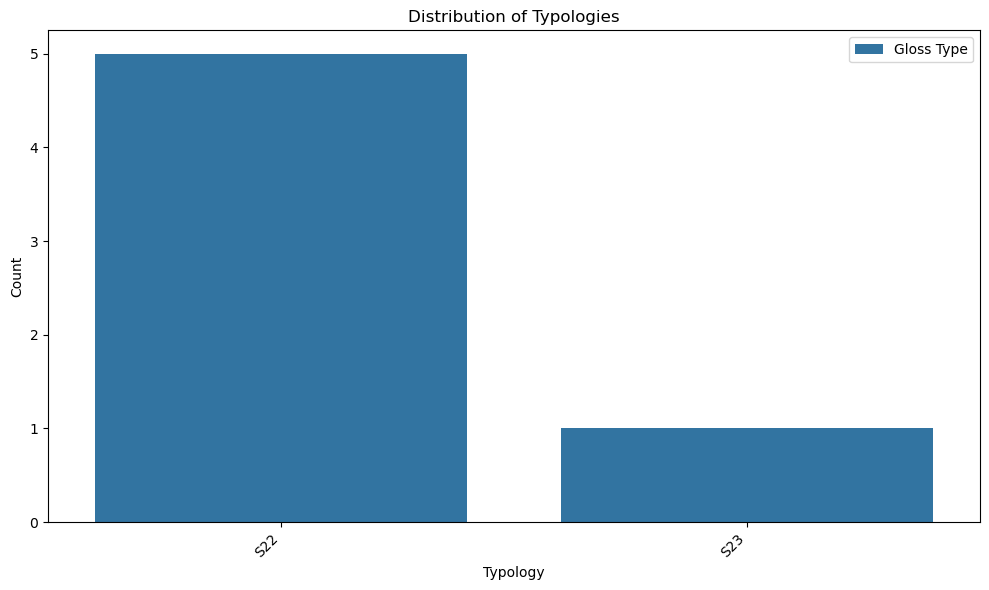

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each typology in the 'gloss_type' column
gloss_type_counts = unique_lemmas_Lat14087['gloss_type'].value_counts()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Combine the two typology counts into a single DataFrame
typology_counts = pd.concat([gloss_type_counts], axis=1)

# Reset the index and rename the columns
typology_counts = typology_counts.reset_index()
typology_counts.columns = ['Typology', 'Gloss Type']

# Melt the DataFrame to convert it into long format
typology_counts = typology_counts.melt(id_vars='Typology', var_name='Column', value_name='Count')

# Filter out rows where the count is zero
typology_counts = typology_counts[typology_counts['Count'] > 0]

# Plot the stacked bar plot
sns.barplot(data=typology_counts, x='Typology', y='Count', hue='Column')

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Typology')
ax.set_ylabel('Count')
ax.set_title('Distribution of Typologies')

# Rotate x-axis labels if needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the legend
ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Let's explore the diversity of the typologies and their relative proportion/size across the Lat14087 dataset - We see that glosses are more diverse in typology and we have a lot of marginal categories and which categories are more privileged in the manuscirpt.

In [13]:
import plotly


In [14]:
import plotly.graph_objects as go


# Count the occurrences of each unique typology in "gloss_type" column
gloss_type_counts = Lat14087['gloss_type'].value_counts()

# Create a DataFrame for the bar chart
gloss_bar_data = pd.DataFrame({'typology': gloss_type_counts.index, 'count': gloss_type_counts.values})

# Create the bar chart figure using plotly
fig = go.Figure()


# Add trace for gloss_type
fig.add_trace(go.Bar(
    x=gloss_bar_data['count'],
    y=gloss_bar_data['typology'],
    orientation='h',
    name='Gloss Type',
    marker=dict(
        color=['green' for count in gloss_bar_data['count']],  # Color bars
    )
))

# Set the title for the bar chart
fig.update_layout(title='Distribution of Typologies across Marginal notes and Glosses with logarithmic scale')

# Set x-axis scale to logarithmic
fig.update_xaxes(type='log')



fig.add_shape(
    type='line',
    x0=15, x1=15, y0=0, y1=1,
    xref='x', yref='paper',
    line=dict(color='black', width=1, dash='dash')
)

fig.add_shape(
    type='line',
    x0=100, x1=100, y0=0, y1=1,
    xref='x', yref='paper',
    line=dict(color='black', width=1, dash='dash')
)

# Show the bar chart
fig.show()


### Let's explore relative proportion of typologies/sizes across the manuscript glosses and marginalia. That way we can understand how lengthy or not a specific typology can be

In [15]:
gloss_relative_proportions = Lat14087.groupby('gloss_type')['gloss_form'].value_counts(normalize=True).reset_index(name='proportion')


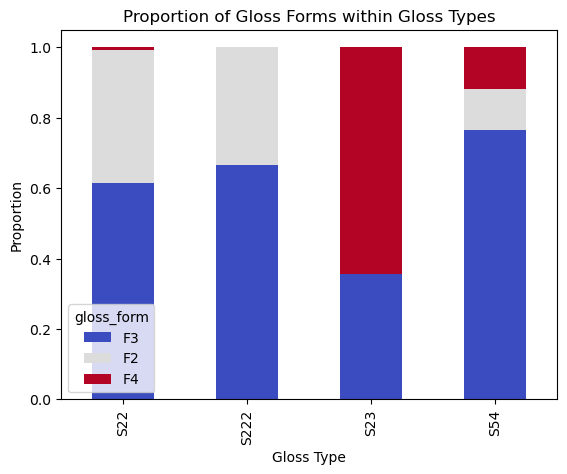

In [18]:
# Filter the DataFrame for typologies with multiple options and meeting the threshold
multiple_options = gloss_relative_proportions.groupby('gloss_type').filter(lambda x: len(x) > 1 and (x['proportion'] > 0.000).any())

# Pivot the DataFrame to have gloss forms as columns
pivot_table = multiple_options.pivot(index='gloss_type', columns='gloss_form', values='proportion')

# Sort the columns based on their total proportions
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

# Plot the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, cmap="coolwarm")

# Set the labels and title
plt.xlabel('Gloss Type')
plt.ylabel('Proportion')
plt.title('Proportion of Gloss Forms within Gloss Types')

# Display the plot
plt.savefig('graphs/proportion_typologies_forms_glosses.png')

plt.show()



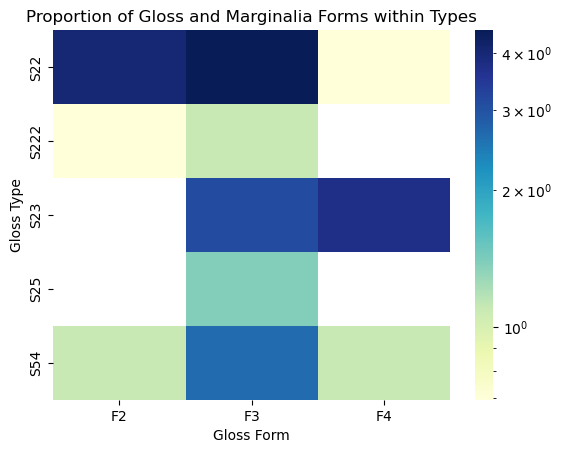

In [19]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm


typologies_of_interest = ['S22','S222', 'S23', 'S25', 'S54']  # Specify the typologies of interest

filtered_df = Lat14087[Lat14087['gloss_type'].isin(typologies_of_interest)]

cross_tab = pd.crosstab(filtered_df['gloss_type'], [filtered_df['gloss_form']])

# Calculate the logarithm of the counts for scaling
log_cross_tab = np.log1p(cross_tab)

# Plot the heatmap with logarithmic scaling
sns.heatmap(data=log_cross_tab, cmap='YlGnBu',norm=LogNorm())

# Set the labels and title
plt.xlabel('Gloss Form')
plt.ylabel('Gloss Type')
plt.title('Proportion of Gloss and Marginalia Forms within Types')

# Display the plot
plt.savefig('graphs/proportion_typologies_forms_glosses_heatmap.png')
plt.show()


## I am interested in questions of annotation density and I want to see if there's a way to objectively count the density of annotations in the page. 

### We are going to count the words per folio in the main txt, and then the amount of lemmas, to determine the percentage of text that is being annotated per page.

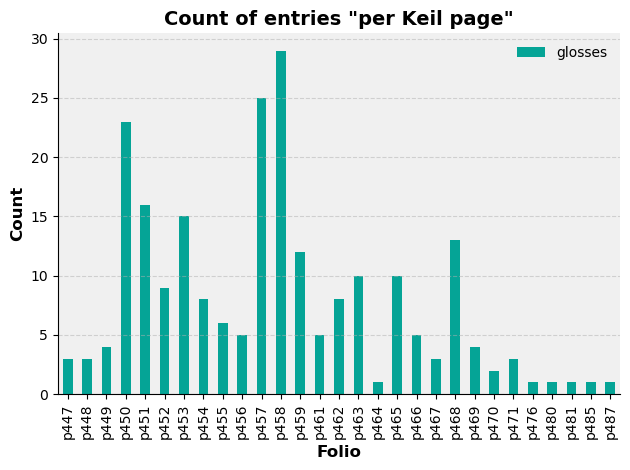

In [23]:
# Group the data by 'folio' and count the occurrences of 'gloss_id' and 'marginal_note_id'
Lat14087['page'] = Lat14087['lemma_id'].str.extract(r'(p\d+)')
Lat14087_diffusion_Keil = Lat14087.groupby('page')['gloss'].count()

# Set a custom color palette
colors = ['#05A496']

# Plot the stacked bar chart
ax = Lat14087_diffusion_Keil.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title
plt.xlabel('Folio', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Count of entries "per Keil page"', fontsize=14, fontweight='bold')

# Customize tick labels rotation and font size
plt.xticks(rotation=90, fontsize=10)

# Customize legend
plt.legend(['glosses'], frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/distribution_glosses_marginal_Keil.png')


# Display the plot
plt.show()

In [21]:
Lat14087_diffusion_Keil=Lat14087_diffusion_Keil.reset_index()
Lat14087_diffusion_Keil

,page,gloss
0,p447,3
1,p448,3
2,p449,4
3,p450,23
4,p451,16
5,p452,9
6,p453,15
7,p454,8
8,p455,6
9,p456,5


In [22]:
Lat14087_diffusion_Keil.to_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat14087_annotations_Keil.csv', encoding='utf-8')
